## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mouse_data

# Display the data table for preview
mouse_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

unique_mice = len(mouse_data["Mouse ID"].unique())

print("Number of mice: " + str(unique_mice))


Number of mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
x = 0
duplicate_mice = []

for row in range(mouse_data.shape[0]):
    if mouse_data.iloc[x, 0] == mouse_data.iloc[(x - 1), 0] and mouse_data.iloc[x, 5] == mouse_data.iloc[(x - 1), 5]:
        duplicate_mice.append(mouse_data.iloc[(x -1), [0, 5]])
        duplicate_mice.append(mouse_data.iloc[x, [0, 5]])
        x = x + 1
    else:
        x = x + 1
        
print(duplicate_mice)

[Mouse ID     g989
Timepoint       0
Name: 908, dtype: object, Mouse ID     g989
Timepoint       0
Name: 909, dtype: object, Mouse ID     g989
Timepoint       5
Name: 910, dtype: object, Mouse ID     g989
Timepoint       5
Name: 911, dtype: object, Mouse ID     g989
Timepoint      10
Name: 912, dtype: object, Mouse ID     g989
Timepoint      10
Name: 913, dtype: object, Mouse ID     g989
Timepoint      15
Name: 914, dtype: object, Mouse ID     g989
Timepoint      15
Name: 915, dtype: object, Mouse ID     g989
Timepoint      20
Name: 916, dtype: object, Mouse ID     g989
Timepoint      20
Name: 917, dtype: object]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = mouse_data.loc[mouse_data["Mouse ID"] == "g989", :]
print(dup_mouse)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data.drop(mouse_data[mouse_data["Mouse ID"] == "g989"].index, inplace = True)

In [6]:
# Checking the number of mice in the clean DataFrame.
mice = len(mouse_data["Mouse ID"].unique())

print("Number of mice: " + str(mice))

Number of mice: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

mouse_mean = mouse_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mouse_median = mouse_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
mouse_variance = mouse_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
mouse_std = mouse_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
mouse_sem = mouse_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

# Assemble the resulting series into a single summary dataframe.

mice_summary = pd.DataFrame({"Mean": mouse_mean, "Median": mouse_median, "Variance": mouse_variance, 
                             "Standard Dev": mouse_variance, "SEM": mouse_sem})

mice_summary



,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,59.450562,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

mouse_aggregation = mouse_data.groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
mouse_aggregation


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

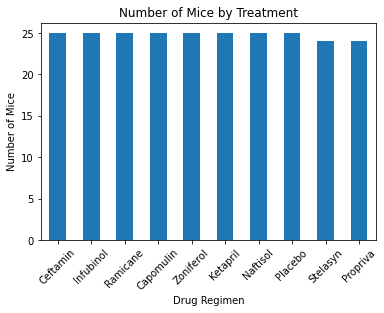

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_count = mouse_data.copy()
drug_count.drop_duplicates(subset =["Mouse ID"], inplace = True)

drug_chart = drug_count["Drug Regimen"].value_counts()

bar_drug_chart = drug_chart.plot.bar(rot=45)
plt.title("Number of Mice by Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
bar_drug_chart

Text(0, 0.5, 'Number of Mice')

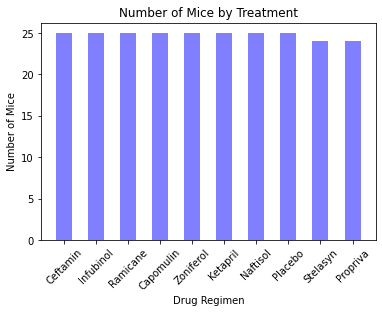

In [69]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

y_pltbar = drug_chart.values
x_pltbar = drug_chart.index.values
#grabs values and then values of index in drug_chart

plt.bar(x_pltbar, y_pltbar, color="b", align="center", alpha=.5, width = .5)

tick_locations = [value for value in x_pltbar]
plt.xticks(tick_locations, rotation=45)

plt.title("Number of Mice by Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")


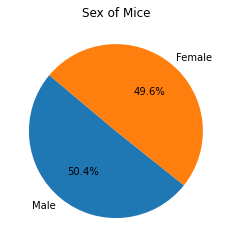

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_sex_chart = drug_count["Sex"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=140)
plt.title("Sex of Mice")
plt.ylabel("")
pie_sex_chart

Text(0.5, 1.0, 'Sex of Mice')

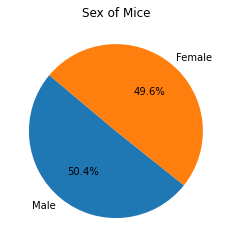

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_chart = drug_count["Sex"].value_counts()

sex = ["Male", "Female"]
sex_pltpie = sex_chart.tolist()

plt.pie(sex_pltpie, labels=sex, autopct="%1.1f%%", startangle=140)
plt.title("Sex of Mice")

## Quartiles, Outliers and Boxplots

In [89]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

filter_data = mouse_data.copy()

drug_filter = filter_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
slice_data = filter_data[drug_filter]

# Start by getting the last (greatest) timepoint for each mouse

x = 0
final_timepoints = []
mouse_ID_timepoints = []
drugs_timepoints = []
tumor_timepoints = []

for row in range(slice_data.shape[0]):
    if slice_data.iloc[x, 0] is not slice_data.iloc[(x - 1), 0]:
        mouse_ID_timepoints.append(slice_data.iloc[(x - 1),0])
        drugs_timepoints.append(slice_data.iloc[(x - 1), 1])
        final_timepoints.append(slice_data.iloc[(x - 1), 5])
        tumor_timepoints.append(slice_data.iloc[(x - 1), 6])
        x = x + 1
    else:
        x = x + 1

timepoint_df = pd.DataFrame({"Mouse ID":mouse_ID_timepoints, "Timepoint":final_timepoints})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_data = pd.merge(timepoint_df, slice_data)
merge_data

#Because of how I created the loop it makes the top mouse in the dataframe z581 instead of k403

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,z581,45,Infubinol,Female,24,25,62.754451,3
1,k403,45,Ramicane,Male,21,16,22.050126,1
2,s185,45,Capomulin,Female,3,17,23.343598,1
3,x401,45,Capomulin,Female,16,15,28.484033,0
4,m601,45,Capomulin,Male,22,17,28.430964,1
...,...,...,...,...,...,...,...,...
95,x581,45,Ceftamin,Female,19,28,64.634949,3
96,x822,45,Ceftamin,Male,3,29,61.386660,3
97,y163,45,Infubinol,Female,17,27,67.685569,3
98,y769,45,Ceftamin,Female,6,27,68.594745,4


In [97]:
# Put treatments into a list for loop (and later for plot labels)

    #see above

# Create empty list to fill with tumor vol data (for plotting)

    #see above

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = merge_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Lower quartile is: {lowerq}")
print(f"Upper quartile is: {upperq}")
print(f"The IQR is: {iqr}")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
 
        #see above 
    
    # add subset

high_outliers = merge_data[merge_data["Tumor Volume (mm3)"] > (upperq + (iqr*1.5))]
low_outliers = merge_data[merge_data["Tumor Volume (mm3)"] < (lowerq - (iqr*1.5))]

    # Determine outliers using upper and lower bounds

total_outliers = len(high_outliers) + len(low_outliers)


print("There are " + str(total_outliers) + " outliers for the combined total of all mice treated with Capomulin, Ramicane, Infubinol, and Ceftamin.")


Lower quartile is: 37.187743802499995
Upper quartile is: 59.930261755000004
The IQR is: 22.74251795250001
There are 0 outliers for the combined total of all mice treated with Capomulin, Ramicane, Infubinol, and Ceftamin.


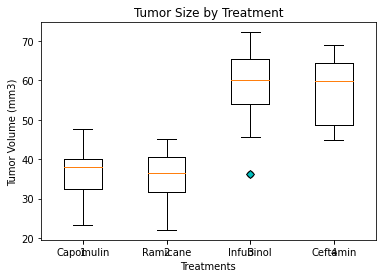

In [96]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Capomulin, Ramicane, infubinol, and Ceftamin

capomulin_filter = merge_data["Drug Regimen"].isin(["Capomulin"])
capomulin_df = merge_data[capomulin_filter]

ramicane_filter = merge_data["Drug Regimen"].isin(["Ramicane"])
ramicane_df = merge_data[ramicane_filter]

infubinol_filter = merge_data["Drug Regimen"].isin(["Infubinol"])
infubinol_df = merge_data[infubinol_filter]

ceftamin_filter = merge_data["Drug Regimen"].isin(["Ceftamin"])
ceftamin_df = merge_data[ceftamin_filter]


data = [capomulin_df["Tumor Volume (mm3)"], ramicane_df["Tumor Volume (mm3)"], 
        infubinol_df["Tumor Volume (mm3)"], ceftamin_df["Tumor Volume (mm3)"]]

drugs = [capomulin_df.iloc[0,2], ramicane_df.iloc[0,2], infubinol_df.iloc[0,2], ceftamin_df.iloc[0,2]]

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Size by Treatment")
ax1.boxplot(data)
cyan_diamond = dict(markerfacecolor='c', marker='D')
ax1.boxplot(data, flierprops=cyan_diamond, labels=drugs)
plt.xlabel("Treatments")
plt.ylabel("Tumor Volume (mm3)")

plt.show()



## Line and Scatter Plots

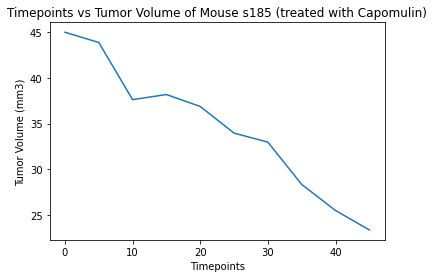

In [71]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_mouse = mouse_data["Mouse ID"].isin(["s185"])
s185_data = mouse_data[capomulin_mouse]

s185_line = plt.plot(s185_data["Timepoint"], s185_data["Tumor Volume (mm3)"])

plt.title("Timepoints vs Tumor Volume of Mouse s185 (treated with Capomulin)")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")

s185_line


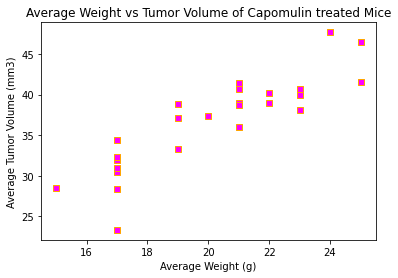

In [84]:
# Generate a scatter plot of AVERAGE tumor volume vs. mouse weight for the Capomulin regimen

capomulin_scatter = plt.scatter(capomulin_df["Weight (g)"], capomulin_df["Tumor Volume (mm3)"], 
                                marker="s", facecolors="magenta", edgecolors="orange")

plt.title("Average Weight vs Tumor Volume of Capomulin treated Mice")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
capomulin_scatter


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
